In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [15]:
# loading sample data to see the structure

sample_file_path = 'data/2023/202300001'

parsed_content = {}

try:
    with open(sample_file_path, 'r') as file:
        # Load the JSON content
        parsed_content = json.load(file)
except Exception as e:
    parsed_content = f"Error parsing JSON file: {e}"

parsed_content

{'abstracts-retrieval-response': {'item': {'ait:process-info': {'ait:status': {'@state': 'new',
     '@type': 'core',
     '@stage': 'S300'},
    'ait:date-delivered': {'@day': '10',
     '@timestamp': '2023-09-10T18:17:31.000031-04:00',
     '@year': '2023',
     '@month': '09'},
    'ait:date-sort': {'@day': '15', '@year': '2023', '@month': '12'}},
   'xocs:meta': {'xocs:funding-list': {'@pui-match': 'primary',
     '@has-funding-info': '1',
     'xocs:funding': {'xocs:funding-agency-matched-string': 'DEST',
      'xocs:funding-id': 'NMHS/2022–23/SG81/01/280'},
     'xocs:funding-addon-generated-timestamp': '2023-09-12T04:56:41.245979Z',
     'xocs:funding-text': 'The authors SK and RK acknowledge the financial support from DEST, HP (India) as a PI and Co-PI, respectively. SK also acknowledges Prof. Paloth Venugopalan, Professor, Department of Chemistry, Panjab University, Chandigarh for his help in structure refinement and continuous motivation. SK is also thanks NMHS (National Miss

In [20]:
# Extract and explore key fields from the JSON data sample
import requests

def get_accessible_link_by_crossref(doi):
    url = f"https://api.crossref.org/works/{doi}"
    response = requests.get(url)
    response_json = response.json()
    # the url is located in message.resource.primary.URL
    return response_json.get("message", {}).get("resource", {}).get("primary", {}).get("URL", "")

def extract_relevant_info(json_data):
    core_data = json_data.get("abstracts-retrieval-response", {}).get("coredata", {})
    authors = core_data.get("dc:creator", {}).get("author", [])
    keywords = json_data.get("abstracts-retrieval-response", {}).get("authkeywords", {}).get("author-keyword", [])
    doi = core_data.get("prism:doi", "")
    # accessible_link = get_accessible_link_by_crossref(doi)
    
    return {
        "title": core_data.get("dc:title", ""),
        "abstract": core_data.get("dc:description", ""),
        "publication_name": core_data.get("prism:publicationName", ""),
        "publication_year": core_data.get("prism:coverDate", "").split("-")[0],
        "authors": [author.get("ce:indexed-name", "") for author in authors],
        "keywords": [keyword.get("$", "") for keyword in keywords],
        "doi": doi,
        # "accessible_link": accessible_link
    }

explored_sample = extract_relevant_info(parsed_content)

explored_sample

{'title': 'Rare coordination behavior of triethanolamine ligand in [Cu(H3tea)2](3,4-dimethoxycinnamate)2·2H2O: Synthesis, characterization, single crystal X-ray structure determination, Hirshfeld calculation and molecular docking studies',
 'abstract': 'Herein, unusual and rare coordination behavior of triethanolamine (H3tea) ligand in copper(II) carboxylate complex; [Cu(H3tea)2](3,4-DMC)2·2H2O; DMC = 3,4-dimethoxycinnamate, has been explored and structurally reported for the first time. Synthesis and crystallization of the complex has been achieved at ambient conditions using methanol-water (4:1 v/v) as a solvent mixture after very slow evaporation. Furthermore, the complex is characterized by elemental analyses, spectroscopic methods (UV–Visible, FT-IR) and structure elucidation has been carried out by single crystal X-ray structure analyses. X-ray structure determination of the complex revealed the presence of [Cu(H3tea)2]2+ as a cation and two moieties of 3,4-dimethoxycinnamate as 

In [21]:
import os

base_dir = "data/2021"

def process_file(file_path):
    try:
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            return extract_relevant_info(json_data)
    except Exception as e:
        return {"file": file_path, "error": str(e)}

# Collect all file paths in the year-wise folders
all_file_paths = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        all_file_paths.append(os.path.join(root, file))

# Initialize a list to store processed data
processed_data_all = []

# Loop through all collected file paths and process them
for file_path in all_file_paths:
    result = process_file(file_path)
    processed_data_all.append(result)

# Convert the processed data into a DataFrame
df_all = pd.DataFrame(processed_data_all)
df_all.dropna(subset=["title", "abstract"], inplace=True)
df_all.drop(columns=["error", "file"], inplace=True)
df_all

,title,abstract,publication_name,publication_year,authors,keywords,doi
0,Home-based chemotherapy for stage III colon ca...,Home-based chemotherapy (HC) is a new treatmen...,Cancer Medicine,2021,[Kulthanachairojana N.],"[colon cancer, cost-utility analysis, home-bas...",10.1002/cam4.3690
1,Efficacy of a protective hand cream versus a c...,Background: Hand hygiene is one of the most ef...,Journal of the Medical Association of Thailand,2021,[Poopat S.],"[Hand hygiene practices, Healthcare workers, P...",10.35755/jmedassocthai.2021.01.11546
2,Factors Associated with the Incidence and Mort...,OBJECTIVES: This meta-analysis was conducted t...,Journal of epidemiology and global health,2021,[Phannajit J.],"[Coronavirus disease-19, epidemiology, health ...",10.2991/jegh.k.210527.001
3,Association between depression and increased r...,INTRODUCTION: Heart failure (HF) is one of the...,Minerva Cardiology and Angiology,2021,[Kewcharoen J.],"[Depression, Heart failure, Patient readmission]",10.23736/S2724-5683.20.05346-3
4,The Effect of a Dual Cure Activator Composed o...,This study evaluated the effect of a dual cure...,Journal of International Dental and Medical Re...,2021,[Leeprakobboon W.],"[Dual cure activator, Microhardness, Self-adhe...",
...,...,...,...,...,...,...,...
3808,Tilapia lake virus immunoglobulin G (TiLV IgG)...,Tilapia lake virus (TiLV) is a notable contagi...,Fish and Shellfish Immunology,2021,[Piewbang C.],"[Antibody, Cellular tropism, Immunoglobulin G,...",10.1016/j.fsi.2021.06.017
3809,Comparison of the initial overseas evacuation ...,During the early stages of the COVID-19 pandem...,Journal of Disaster Research,2021,[Leelawat N.],"[COVID-19, Disaster evacuation, Overseas evacu...",10.20965/jdr.2021.p1137
3811,Deterring collusion with a reserve price: an a...,We experimentally compare collusive behaviors ...,Experimental Economics,2021,[Sujarittanonta P.],"[Auctions, Bribes, Collusion, Experiment, Rese...",10.1007/s10683-020-09671-x
3812,ConCerv: a prospective trial of conservative s...,OBJECTIVE: The objective of the ConCerv Trial ...,International journal of gynecological cancer ...,2021,[Schmeler K.M.],"[cervix uteri, hysterectomy, lymph nodes, surg...",10.1136/ijgc-2021-002921


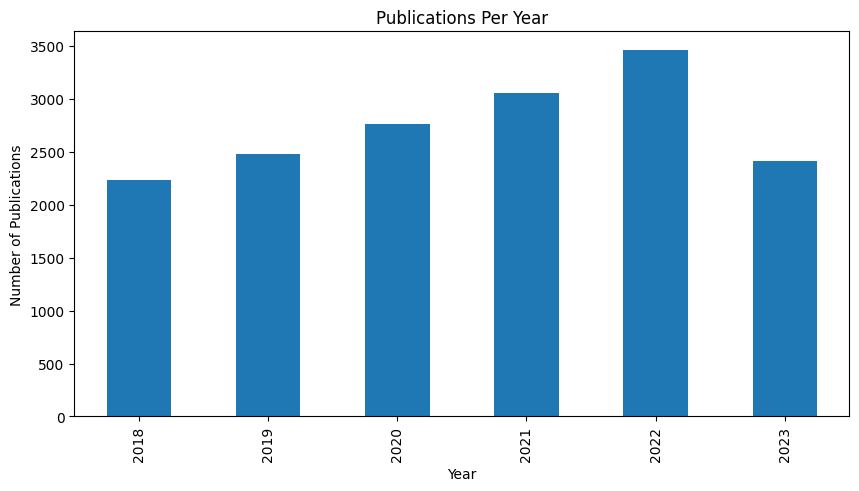

In [13]:
# Yearly publication trend
yearly_counts = df_all['publication_year'].value_counts().sort_index()
yearly_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Publications Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()
